In [2]:
from fastbook import *
from fastai.imports import *
from fastdownload import *
from fastai.vision.all import *
from fastai.vision.widgets import *
import timm
%matplotlib inline

In [7]:
import pandas as pd
dataset = pd.read_csv('Language Detection.csv')

In [4]:
dataset['Language'].value_counts()

English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: Language, dtype: int64

In [7]:
path = Path('train_data_language')
path.mkdir(parents=True, exist_ok=True)
#available_languages = list(dataset['Language'].value_counts().index)
available_languages = ['Sweedish' , 'Spanish']
for language in available_languages:
    path_language = path/language
    path_language.mkdir(parents=True, exist_ok=True)
    print(f'current language is {language}')
    for i in range(len(dataset)):
        if dataset.loc[i].Language == language:
            try :
                create_image_from_text1(dataset.loc[i].Text, path_language/(f'sample{i}.jpg'))
            except :
                print(dataset.loc[i].Text)

current language is Sweedish
current language is Spanish


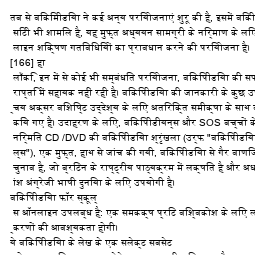

In [64]:

from PIL import Image, ImageDraw , ImageFont

def create_image_from_text(text,name_of_file):
    width = 255
    height = 255
    n=65
    splitted_string =  [text[i:i+n] for i in range(0, len(text), n)]
    text = ' \n '.join(splitted_string)
    img = Image.new('L', (width, height), color='white')
    imgDraw = ImageDraw.Draw(img)
    imgDraw.text((10, 10), text, fill=(0) , font=ImageFont.truetype("arial-unicode-ms.ttf", 10 ,layout_engine=ImageFont.LAYOUT_RAQM ,encoding='utf-8'))
    img.save(name_of_file)
    return img

create_image_from_text(dataset.loc[1997].Text , 'dasd.jpg')

In [60]:
dataset[dataset['Text'].str.len()==dataset.Text.str.len().max()]
dataset.loc[1997]

Text        तब से विकिमीडिया ने कई अन्य परियोजनाएं शुरू की...
Language                                                Hindi
Name: 1997, dtype: object

In [79]:
path = Path('train_data_language')
path.mkdir(parents=True, exist_ok=True)
#available_languages = list(dataset['Language'].value_counts().index)
available_languages = ['English' , 'French' , 'Spanish' , 'Russian' , 'Sweedish' , 'Portugeese' ,
                        'Italian' , 'Dutch' , 'Arabic' , 'Turkish' , 'German' , 'Danish' , 'Greek'
                         ]
for language in available_languages:
    path_language = path/language
    path_language.mkdir(parents=True, exist_ok=True)
    print(f'current language is {language}')
    for i in range(len(dataset)):
        if dataset.loc[i].Language == language:
            try :
                create_image_from_text1(dataset.loc[i].Text, path_language/(f'sample{i}.jpg'))
            except :
                print(dataset.loc[i].Text)

current language is English
current language is French
current language is Spanich
current language is Russian
current language is Swedish
current language is Portugeese
current language is Italian
current language is Dutch
current language is Arabic
current language is Turkish
current language is German
current language is Danish
current language is Greek


In [11]:
path = Path('train_data_language')
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.3, seed=42),
    get_y=parent_label,
    item_tfms=[RandomResizedCrop(224, min_scale=0.5)],
    batch_tfms=aug_transforms()
).dataloaders(path)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


In [ ]:
model = vision_learner(dls , 'convnext_small', metrics = accuracy)
model.fine_tune(10)